In [1]:
#pip install torch torchvision torchaudio

In [1]:
import pandas as pd
import json
from google.colab import drive
from torchvision import models
import numpy as np
import torch.optim as optim
from torchvision import transforms
from PIL import Image
import os
import cv2
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [2]:
drive.mount('/content/drive')

project_path = '/content/drive/MyDrive/Informatyka/semestr_6/WTUM/Projekt/WTUM/Penguins-vs-turtles-image-classification-main/'


Mounted at /content/drive


In [3]:
df = pd.read_json(project_path + 'train_annotations')
df_valid = pd.read_json(project_path + 'valid_annotations')

In [4]:
df = df[['image_id', 'category_id']]
df_valid = df_valid[['image_id', 'category_id']]

In [5]:
df.head()

image_id  category_id
0         0            1
1         1            1
2         2            2
3         3            2
4         4            1

In [6]:
df_valid.head()

image_id  category_id
0         0            1
1         1            2
2         2            2
3         3            1
4         4            1

In [7]:
# rozmiar
print(df.shape)
print(df_valid.shape)

(500, 2)
(72, 2)


In [8]:
print(df.info())
print(df_valid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   image_id     500 non-null    int64
 1   category_id  500 non-null    int64
dtypes: int64(2)
memory usage: 7.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   image_id     72 non-null     int64
 1   category_id  72 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB
None


In [9]:
unique_image_ids = df['image_id'].unique()
category_id_counts = df['category_id'].value_counts()

print(len(unique_image_ids))
print("Zakres wartości", min(unique_image_ids),"-", max(unique_image_ids))
print()
print("Etykiety")
print(category_id_counts)

500
Zakres wartości 0 - 499

Etykiety
category_id
1    250
2    250
Name: count, dtype: int64


In [10]:
unique_image_ids = df_valid['image_id'].unique()
category_id_counts = df_valid['category_id'].value_counts()

print(len(unique_image_ids))
print("Zakres wartości", min(unique_image_ids),"-", max(unique_image_ids))
print()
print("Etykiety")
print(category_id_counts)

72
Zakres wartości 0 - 71

Etykiety
category_id
1    36
2    36
Name: count, dtype: int64


In [12]:
#wczytanie ścieżek do plików
Id_train = []

for dirname, _, filenames in os.walk(project_path + 'train/'):
    for filename in filenames:
        Id_train.append(os.path.join(dirname, filename))
Id_train[:5]

['/content/drive/MyDrive/Informatyka/semestr_6/WTUM/Projekt/WTUM/Penguins-vs-turtles-image-classification-main/train/image_id_019.jpg',
 '/content/drive/MyDrive/Informatyka/semestr_6/WTUM/Projekt/WTUM/Penguins-vs-turtles-image-classification-main/train/image_id_014.jpg',
 '/content/drive/MyDrive/Informatyka/semestr_6/WTUM/Projekt/WTUM/Penguins-vs-turtles-image-classification-main/train/image_id_018.jpg',
 '/content/drive/MyDrive/Informatyka/semestr_6/WTUM/Projekt/WTUM/Penguins-vs-turtles-image-classification-main/train/image_id_028.jpg',
 '/content/drive/MyDrive/Informatyka/semestr_6/WTUM/Projekt/WTUM/Penguins-vs-turtles-image-classification-main/train/image_id_026.jpg']

In [13]:
Id_valid = []

for dirname, _, filenames in os.walk(project_path + 'valid/'):
    for filename in filenames:
        Id_valid.append(os.path.join(dirname, filename))
Id_valid[:5]

['/content/drive/MyDrive/Informatyka/semestr_6/WTUM/Projekt/WTUM/Penguins-vs-turtles-image-classification-main/valid/image_id_019.jpg',
 '/content/drive/MyDrive/Informatyka/semestr_6/WTUM/Projekt/WTUM/Penguins-vs-turtles-image-classification-main/valid/image_id_022.jpg',
 '/content/drive/MyDrive/Informatyka/semestr_6/WTUM/Projekt/WTUM/Penguins-vs-turtles-image-classification-main/valid/image_id_009.jpg',
 '/content/drive/MyDrive/Informatyka/semestr_6/WTUM/Projekt/WTUM/Penguins-vs-turtles-image-classification-main/valid/image_id_010.jpg',
 '/content/drive/MyDrive/Informatyka/semestr_6/WTUM/Projekt/WTUM/Penguins-vs-turtles-image-classification-main/valid/image_id_024.jpg']

In [14]:
train = pd.DataFrame()
train = train.assign(filename = Id_train)
train['image_id'] = train['filename'].str.replace(project_path + 'train/image_id_','')
train['image_id'] = train['image_id'].str.replace('.jpg','')
train['image_id'] = train['image_id'].astype(int)
train.head()

filename  image_id
0  /content/drive/MyDrive/Informatyka/semestr_6/W...        19
1  /content/drive/MyDrive/Informatyka/semestr_6/W...        14
2  /content/drive/MyDrive/Informatyka/semestr_6/W...        18
3  /content/drive/MyDrive/Informatyka/semestr_6/W...        28
4  /content/drive/MyDrive/Informatyka/semestr_6/W...        26

In [15]:
valid = pd.DataFrame()
valid = valid.assign(filename = Id_valid)
valid['image_id'] = valid['filename'].str.replace(project_path + 'valid/image_id_','')
valid['image_id'] = valid['image_id'].str.replace('.jpg','')
valid['image_id'] = valid['image_id'].astype(int)
valid.head()

filename  image_id
0  /content/drive/MyDrive/Informatyka/semestr_6/W...        19
1  /content/drive/MyDrive/Informatyka/semestr_6/W...        22
2  /content/drive/MyDrive/Informatyka/semestr_6/W...         9
3  /content/drive/MyDrive/Informatyka/semestr_6/W...        10
4  /content/drive/MyDrive/Informatyka/semestr_6/W...        24

In [16]:
print(train.shape)
print(valid.shape)

(500, 2)
(72, 2)


In [17]:
unique_image_ids = train['image_id'].unique()

print(len(unique_image_ids))
print("Zakres wartości", min(unique_image_ids),"-", max(unique_image_ids))

500
Zakres wartości 0 - 499


In [18]:
unique_image_ids = valid['image_id'].unique()

print(len(unique_image_ids))
print("Zakres wartości", min(unique_image_ids),"-", max(unique_image_ids))

72
Zakres wartości 0 - 71


In [19]:
#połączenie danych
train_data = pd.merge(train,df,on='image_id',how='outer')
train_data = train_data[['filename','category_id']]
train_data.columns = ['filename','label']
train_data.head()

filename  label
0  /content/drive/MyDrive/Informatyka/semestr_6/W...      2
1  /content/drive/MyDrive/Informatyka/semestr_6/W...      1
2  /content/drive/MyDrive/Informatyka/semestr_6/W...      2
3  /content/drive/MyDrive/Informatyka/semestr_6/W...      1
4  /content/drive/MyDrive/Informatyka/semestr_6/W...      1

In [20]:
valid_data = pd.merge(valid,df_valid,on='image_id',how='outer')
valid_data = valid_data[['filename','category_id']]
valid_data.columns = ['filename','label']
valid_data.head()

filename  label
0  /content/drive/MyDrive/Informatyka/semestr_6/W...      2
1  /content/drive/MyDrive/Informatyka/semestr_6/W...      2
2  /content/drive/MyDrive/Informatyka/semestr_6/W...      1
3  /content/drive/MyDrive/Informatyka/semestr_6/W...      2
4  /content/drive/MyDrive/Informatyka/semestr_6/W...      1

In [21]:
train_data['filename'] = train_data['filename'].str.replace(project_path + 'train/','')
train_data.head()

filename  label
0  image_id_019.jpg      2
1  image_id_014.jpg      1
2  image_id_018.jpg      2
3  image_id_028.jpg      1
4  image_id_026.jpg      1

In [22]:
valid_data['filename'] = valid_data['filename'].str.replace(project_path + 'valid/','')
valid_data.head()

filename  label
0  image_id_019.jpg      2
1  image_id_022.jpg      2
2  image_id_009.jpg      1
3  image_id_010.jpg      2
4  image_id_024.jpg      1

In [23]:
train_data['label'] = train_data['label'].replace({1:0,2:1})
train_data.head()

filename  label
0  image_id_019.jpg      1
1  image_id_014.jpg      0
2  image_id_018.jpg      1
3  image_id_028.jpg      0
4  image_id_026.jpg      0

In [24]:
valid_data['label'] = valid_data['label'].replace({1:0,2:1})
valid_data.head()

filename  label
0  image_id_019.jpg      1
1  image_id_022.jpg      1
2  image_id_009.jpg      0
3  image_id_010.jpg      1
4  image_id_024.jpg      0

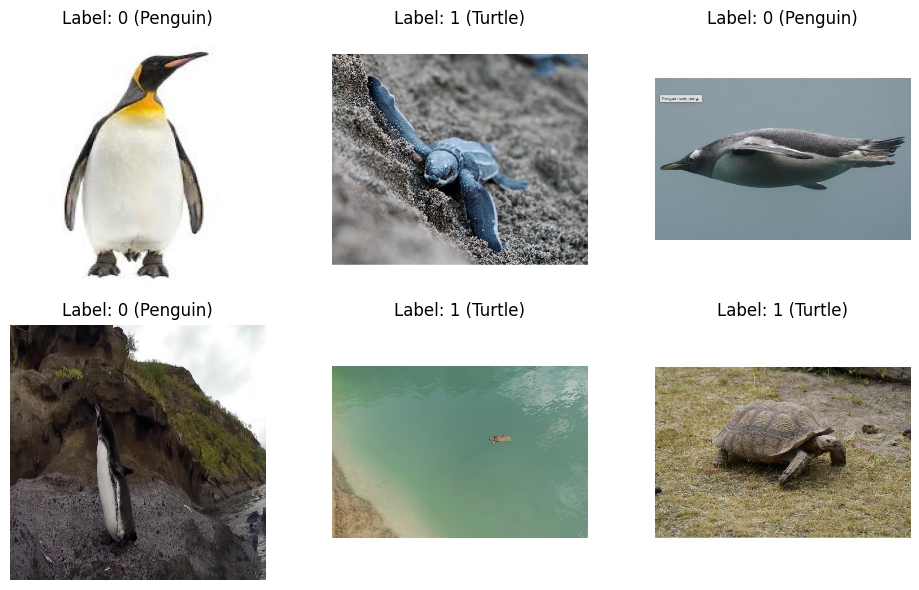

In [25]:
# wyświetlenie 6 losowych obrazków z etykietami

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
image_folder_path = project_path + 'train/'
random_indices = random.sample(range(len(train_data)), 6)

for idx, ax in zip(random_indices, ax.ravel()):
    label = train_data['label'][idx]
    file_path = os.path.join(image_folder_path, train_data['filename'][idx])

    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    ax.imshow(image)
    ax.set_title(f"Label: {label} ({'Penguin' if label == 0 else 'Turtle'})")

    ax.axis('off')

plt.tight_layout()
plt.show()

In [27]:
# transformacje obrazków
train_transforms = transforms.Compose([
      transforms.RandomResizedCrop(224),
      transforms.RandomHorizontalFlip(),
      transforms.ToTensor(),
      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [28]:
# wczytanie treningowych danych jako tensor
images = []
labels = []

for i,annotation in train_data.iterrows():
    image_name = annotation['filename']
    target = annotation['label']
    image_path = os.path.join(project_path + 'train', image_name)
    image = Image.open(image_path).convert("RGB")
    image = train_transforms(image)
    images.append(image)
    labels.append(torch.tensor(target))

image_tensor = torch.stack(images)
target_tensor = torch.stack(labels)
print(image_tensor.shape)
print(target_tensor.shape)

train_dataset = torch.utils.data.TensorDataset(image_tensor, target_tensor)

torch.Size([500, 3, 224, 224])
torch.Size([500])


In [29]:
# wczytanie testowych danych jako tensor
images = []
labels = []

for i,annotation in valid_data.iterrows():
    image_name = annotation['filename']
    target = annotation['label']
    image_path = os.path.join(project_path + 'valid', image_name)
    image = Image.open(image_path).convert("RGB")
    image = valid_transforms(image)
    images.append(image)
    labels.append(torch.tensor(target))

image_tensor = torch.stack(images)
target_tensor = torch.stack(labels)
print(image_tensor.shape)
print(target_tensor.shape)

valid_dataset = torch.utils.data.TensorDataset(image_tensor, target_tensor)

torch.Size([72, 3, 224, 224])
torch.Size([72])


In [30]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=64, shuffle=False)

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## funkcje pomocnicze

In [32]:
#pętla treningowa
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, val_loader):
    for epoch in range(n_epochs):
        model.train()
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)

            optimizer.zero_grad()
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        epoch_loss = loss_train / len(train_loader)

        if (epoch + 1) % 5 == 0:
            #walidacja modelu
            model.eval()
            val_loss = 0.0
            correct = 0
            total = 0
            with torch.no_grad():

                for imgs, labels in val_loader:
                  imgs = imgs.to(device)
                  labels = labels.to(device)

                  outputs = model(imgs)
                  loss = loss_fn(outputs, labels)
                  val_loss += loss.item()
                  preds = torch.argmax(outputs, dim=1)
                  total += labels.shape[0]
                  correct += int((preds == labels).sum())

                val_loss /= len(val_loader.dataset)
                val_accuracy = correct / total

            print(f'Epoch {epoch+1}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

In [33]:
# walidacja dokładności modelu
def validate(model, train_loader, val_loader):
    model.eval()
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device)
                labels = labels.to(device)
                outputs = model(imgs)
                preds = torch.argmax(outputs, dim=1)
                total += labels.shape[0]
                correct += int((preds == labels).sum())

        print(f"{name} accuracy: {correct/total}")

In [34]:
# wyświetlenie 10 osowych obrazków z przewidywanymi i rzeczywistymi etykietami
def visual_validation(model, valid_loader):

    class_names = ["penguin", "turtle"]
    model.eval()

    random_indices = random.sample(range(len(valid_loader.dataset)), 10)

    random_data = [valid_loader.dataset[idx] for idx in random_indices]
    random_images, random_labels = zip(*random_data)

    random_images_tensor = torch.stack(random_images)
    random_images_tensor = random_images_tensor.to('cuda')

    with torch.no_grad():
        output = model(random_images_tensor)

    fig = plt.figure(figsize=(15, 6))
    for i in range(10):
        ax = fig.add_subplot(2, 5, i + 1)
        plt.tight_layout()
        img = random_images[i].permute(1, 2, 0).cpu().numpy()
        img = (img - img.min()) / (img.max() - img.min())

        ax.imshow(img, interpolation='none')

        predicted_label = class_names[output.max(1)[1][i].item()]
        actual_label = class_names[random_labels[i].item()]

        ax.set_title(f"Prediction: {predicted_label}\nActual: {actual_label}")
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

## wczytanie pretrenowanych modeli

In [60]:
# resnet18 - wszystkie wartwy trenowane
model_resnet18 = models.resnet18(pretrained=True)

num_features = model_resnet18.fc.in_features
model_resnet18.fc = torch.nn.Linear(num_features, 2)

model_resnet18.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [59]:
# resnet18 - pretrenowane warsty nie są dalej trenowane
model_resnet18_frozen = models.resnet18(pretrained=True)

for param in model_resnet18_frozen.parameters():
    param.requires_grad = False

num_features = model_resnet18_frozen.fc.in_features
model_resnet18_frozen.fc = torch.nn.Linear(num_features, 2)

model_resnet18_frozen.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [35]:
# vgg - wszystkie wartwy trenowane
model_vgg16 = models.vgg16(pretrained=True)

num_features = model_vgg16.classifier[6].in_features

model_vgg16.classifier[6] = torch.nn.Linear(num_features, 2)
model_vgg16.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 123MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [48]:
# vgg16 - pretrenowane warsty nie są dalej trenowane
model_vgg16_frozen = models.vgg16(pretrained=True)
for parameter in model_vgg16_frozen.parameters():
    parameter.requires_grad = False

num_features = model_vgg16_frozen.classifier[6].in_features

model_vgg16_frozen.classifier[6] = torch.nn.Linear(num_features, 2)
model_vgg16_frozen.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## resnet18 frozen

In [71]:
# trenowanie modelu resnet18 z zamrożonymi warstwami pretrenowanymi
optimizer = torch.optim.SGD(model_resnet18_frozen.parameters(), lr=0.01, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 25,
    optimizer = optimizer,
    model = model_resnet18_frozen,
    loss_fn = loss_fn,
    train_loader = train_loader,
    val_loader = valid_loader
)

Epoch 5, Train Loss: 0.0619, Val Loss: 0.0021, Val Accuracy: 0.9583
Epoch 10, Train Loss: 0.0218, Val Loss: 0.0012, Val Accuracy: 0.9722
Epoch 15, Train Loss: 0.0350, Val Loss: 0.0014, Val Accuracy: 0.9583
Epoch 20, Train Loss: 0.0108, Val Loss: 0.0012, Val Accuracy: 0.9722
Epoch 25, Train Loss: 0.0090, Val Loss: 0.0012, Val Accuracy: 0.9722


In [72]:
validate(model_resnet18_frozen, train_loader, valid_loader)

train accuracy: 1.0
val accuracy: 0.9722222222222222


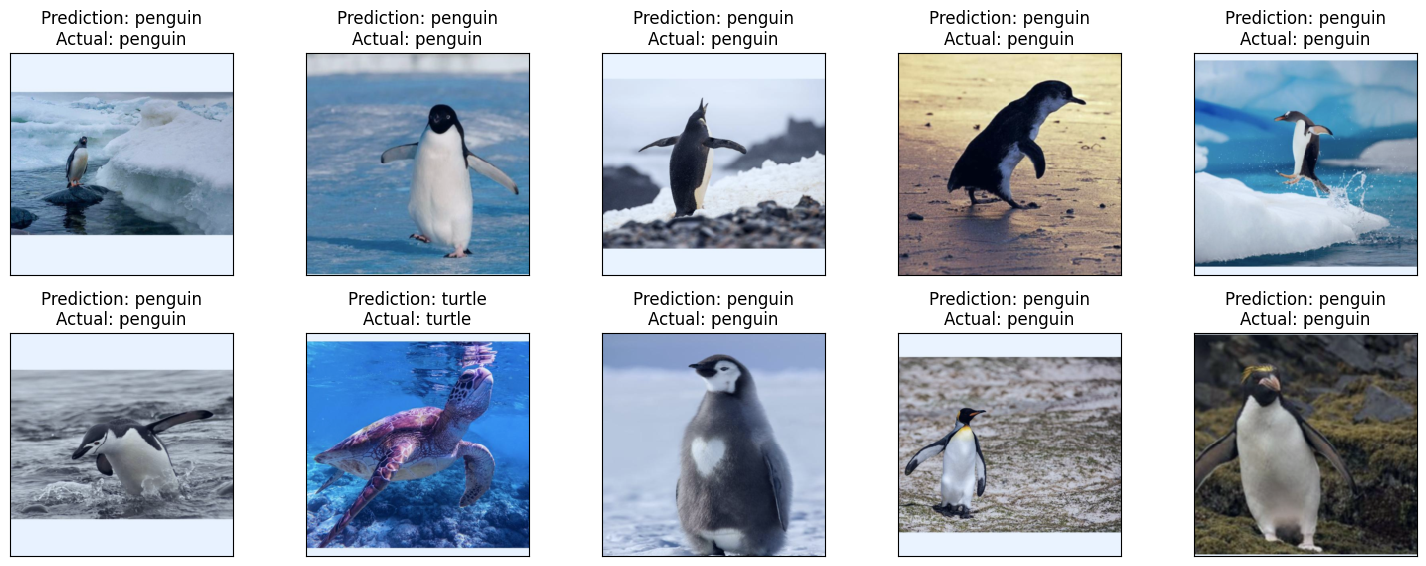

In [67]:
visual_validation(model_resnet18_frozen, valid_loader)

## resnet18

In [95]:
# trening resnet18 z wszystkimi warstwami trenowalnymi
optimizer = torch.optim.SGD(model_resnet18.parameters(), lr=0.01, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 25,
    optimizer = optimizer,
    model = model_resnet18,
    loss_fn = loss_fn,
    train_loader = train_loader,
    val_loader = valid_loader
)

Epoch 5, Train Loss: 0.0031, Val Loss: 0.0017, Val Accuracy: 0.9444
Epoch 10, Train Loss: 0.0004, Val Loss: 0.0005, Val Accuracy: 0.9861
Epoch 15, Train Loss: 0.0002, Val Loss: 0.0006, Val Accuracy: 0.9722
Epoch 20, Train Loss: 0.0002, Val Loss: 0.0006, Val Accuracy: 0.9861
Epoch 25, Train Loss: 0.0001, Val Loss: 0.0007, Val Accuracy: 0.9861


In [96]:
validate(model_resnet18, train_loader, valid_loader)

train accuracy: 1.0
val accuracy: 0.9861111111111112


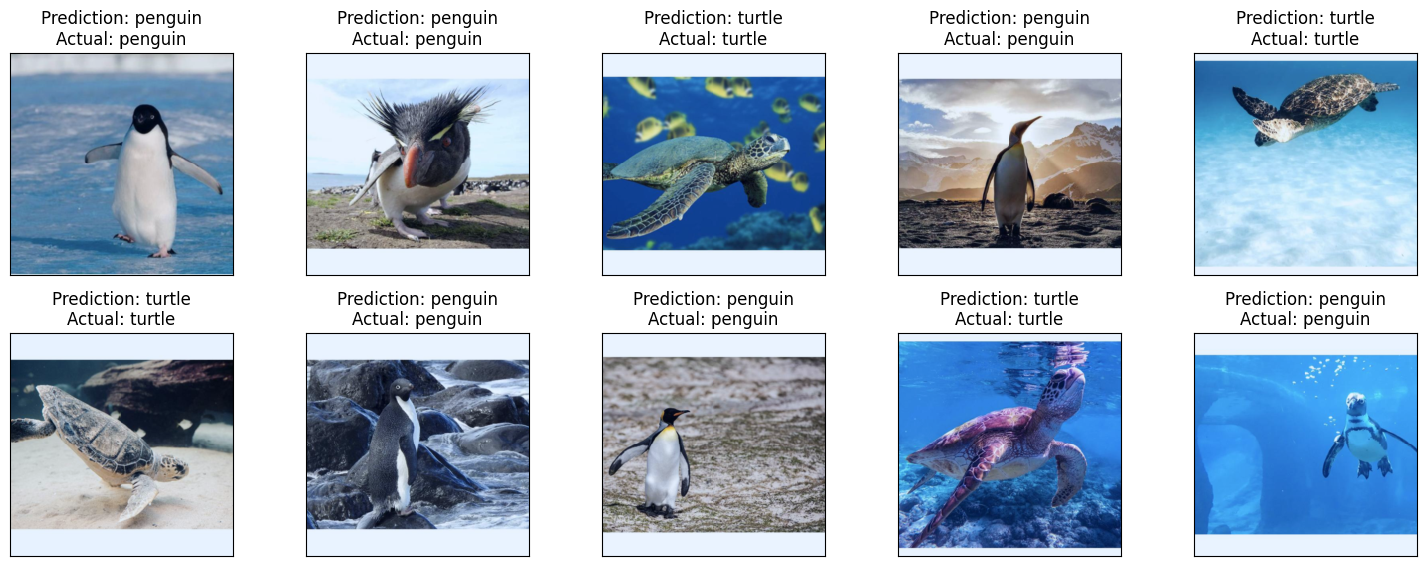

In [97]:
visual_validation(model_resnet18, valid_loader)

## vgg16 frozen

In [119]:
# trenowanie modelu vgg16 z zamrożonymi warstwami pretrenowanymi
optimizer = torch.optim.SGD(model_vgg16_frozen.parameters(), lr=0.01, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 25,
    optimizer = optimizer,
    model = model_vgg16_frozen,
    loss_fn = loss_fn,
    train_loader = train_loader,
    val_loader = valid_loader
)

Epoch 5, Train Loss: 0.0380, Val Loss: 0.0014, Val Accuracy: 0.9861
Epoch 10, Train Loss: 0.0067, Val Loss: 0.0013, Val Accuracy: 0.9861
Epoch 15, Train Loss: 0.0159, Val Loss: 0.0009, Val Accuracy: 0.9861
Epoch 20, Train Loss: 0.0039, Val Loss: 0.0006, Val Accuracy: 0.9861
Epoch 25, Train Loss: 0.0081, Val Loss: 0.0010, Val Accuracy: 0.9861


In [121]:
validate(model_vgg16_frozen, train_loader, valid_loader)

train accuracy: 1.0
val accuracy: 0.9861111111111112


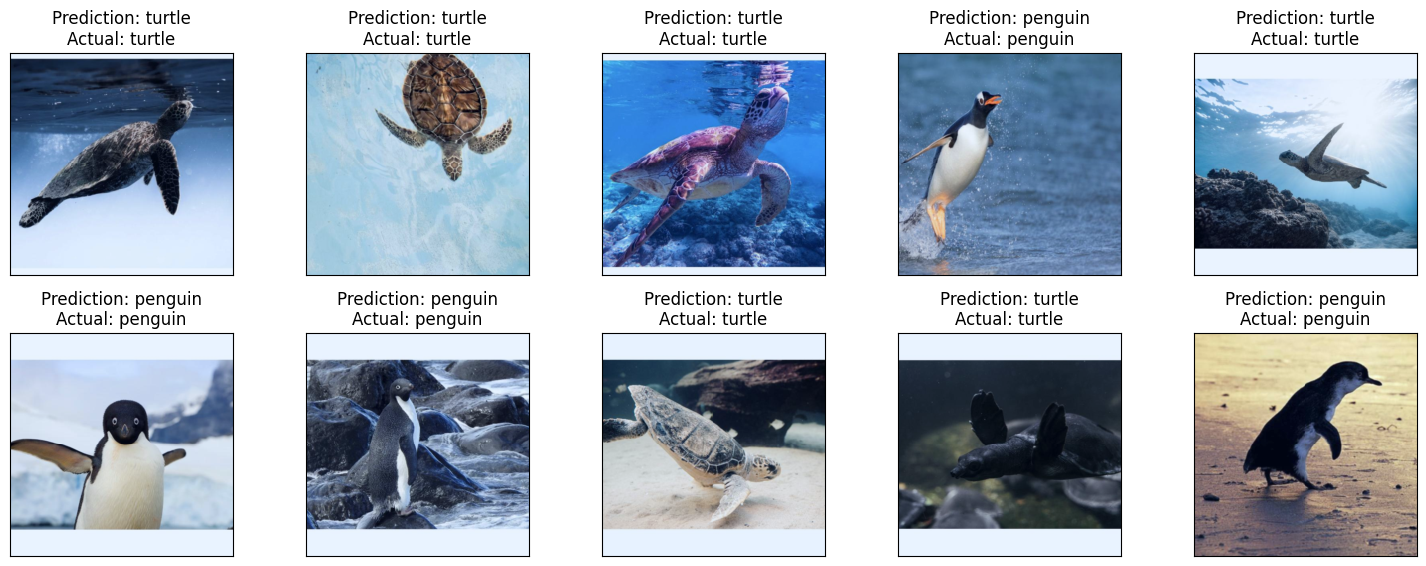

In [124]:
visual_validation(model_vgg16_frozen, valid_loader)

In [125]:
torch.save({
            'model_state_dict': model_vgg16_frozen.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            }, 'model_vgg16.pth')


## vgg16

In [36]:
# trenowanie modelu vgg16 z wszystkimi warstwami trenowalnymi
optimizer = torch.optim.SGD(model_vgg16.parameters(), lr=0.01, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 25,
    optimizer = optimizer,
    model = model_vgg16,
    loss_fn = loss_fn,
    train_loader = train_loader,
    val_loader = valid_loader
)

Epoch 5, Train Loss: 0.2862, Val Loss: 0.0078, Val Accuracy: 0.9028
Epoch 10, Train Loss: 0.0106, Val Loss: 0.0054, Val Accuracy: 0.9167
Epoch 15, Train Loss: 0.0006, Val Loss: 0.0122, Val Accuracy: 0.9444
Epoch 20, Train Loss: 0.0001, Val Loss: 0.0089, Val Accuracy: 0.9306
Epoch 25, Train Loss: 0.0000, Val Loss: 0.0092, Val Accuracy: 0.9306


In [37]:
validate(model_vgg16, train_loader, valid_loader)

train accuracy: 1.0
val accuracy: 0.9305555555555556


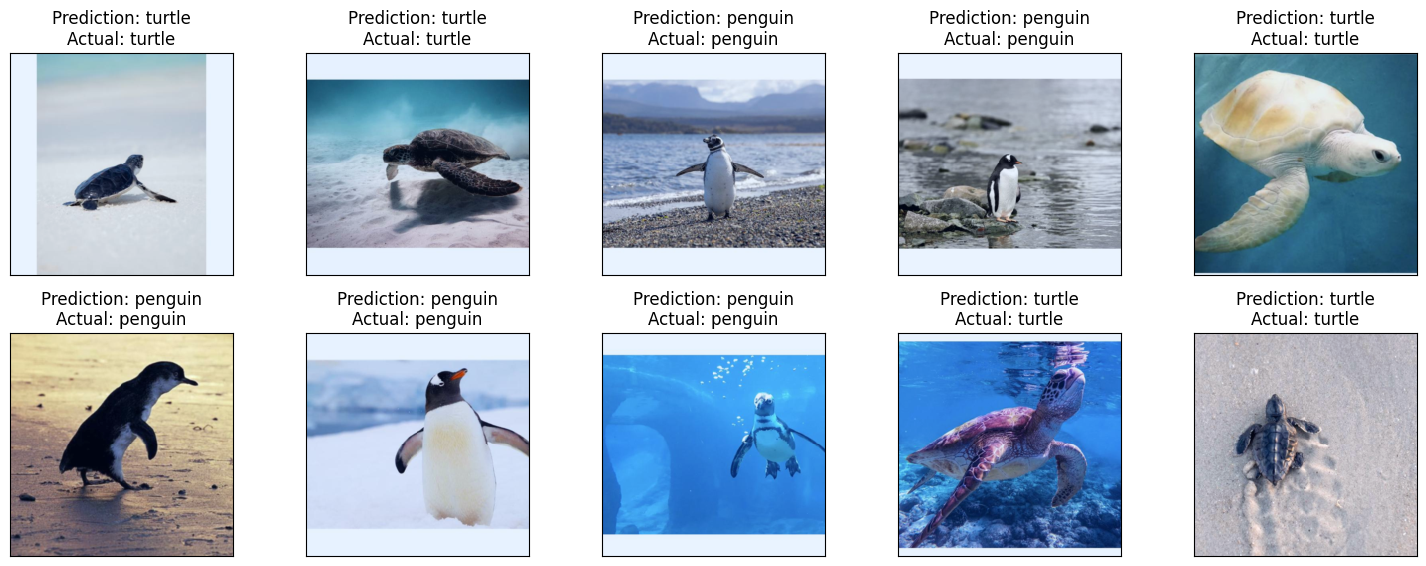

In [39]:
visual_validation(model_vgg16, valid_loader)

## załadowanie wytrenowanych modeli

In [68]:
model1 = torch.load('model_resnet18.pth')

In [ ]:
model2 = torch.load('model_vgg16.pth')